In [90]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date,timedelta
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns
import pandas_ta as ta
import numpy as np
import json
from tkinter import *
from tkinter import messagebox, ttk, END

In [91]:
import json
from tkinter import *
from tkinter import messagebox

FONT_NAME = "Courier"
analysis = ['Price', 'RSI', 'MACD', 'Bollinger Bands', 'M10&M20', 'ALL']

# Global variable to store the selected analysis
global_selected_analysis = []

# Functions
def send_data():
    global global_selected_analysis  # Use global variable

    ticker = input_ticker.get().upper()
    days = input_time.get()  # Removed int conversion to catch errors more easily
    mail = input_mail.get()

    # Try to convert days to int
    try:
        days = int(days)
    except ValueError:
        messagebox.showwarning(title="Warning", message="Days must be a number")
        return

    new_data = {
        "stock": {
            "ticker": ticker,
            "days": days,
            "mail": mail,
            "analysis": global_selected_analysis  # Include selected analysis in the data
        }
    }

    # Validation checks
    if len(ticker) == 0 or days == 0 or len(mail) == 0:
        messagebox.showwarning(title="Warning", message="Check your data")
    elif len(ticker) > 8:
        messagebox.showwarning(title="Warning", message='Ticker too long')
    elif days < 1 or days > 720:
        messagebox.showwarning(title="Warning", message='Check your date period')
    elif "@" not in mail or "." not in mail:
        messagebox.showwarning(title="Warning", message='Check your mail, there is no @')
        return
    else:
        messagebox.showinfo(title="Check your mail", message='Data was sent')

    # Save data to file
    try:
        data_file_path = './data/data.json'
        try:
            with open(data_file_path, mode="r") as data_file:
                data = json.load(data_file)
        except json.JSONDecodeError:
            data = {}

        data.update(new_data)

        with open(data_file_path, mode="w") as data_file:
            json.dump(data, data_file, indent=4)

    except Exception as e:
        messagebox.showerror(title="Error", message=f"An error occurred: {e}")
    finally:
        # Clear the input fields
        input_ticker.delete(0, END)
        input_time.delete(0, END)
        input_mail.delete(0, END)

# Function to get selected analysis
def selected_item():
    global global_selected_analysis  # Use global variable
    global_selected_analysis.clear()  # Clear previous selections
    chosen = listbox.curselection()  # Get selected indices
    for v in chosen:
        op = listbox.get(v)  # Get the actual value of the selected item
        global_selected_analysis.append(op)

    print(f"Inside selected_item: {global_selected_analysis}")

# UI
window = Tk()
window.config(padx=25, pady=25)
window.title('Stock Market Analysis')

canvas = Canvas(width=500, height=500, highlightthickness=0)
stock_png = PhotoImage(file='./images/stock_graph.png')
canvas.create_image(250, 250, image=stock_png)
canvas.grid(column=1, row=0)

# Ticker Input
stock = Label(text='Ticker Name', font=(FONT_NAME, 12))
stock.grid(column=0, row=1)

input_ticker = Entry(width=21)
input_ticker.grid(column=1, row=1)

# Time period input
time = Label(text='Time period in days (max 720)', font=(FONT_NAME, 12))
time.grid(column=0, row=2)

input_time = Entry(width=21)
input_time.grid(column=1, row=2)

# Email input
email = Label(text='Write your email', font=(FONT_NAME, 12))
email.grid(column=0, row=3)

input_mail = Entry(width=21)
input_mail.grid(column=1, row=3)

# Analysis selection
analysis_type = Label(text='Choose analysis type', font=(FONT_NAME, 12))
analysis_type.grid(column=0, row=4)

listbox = Listbox(window, selectmode='multiple', exportselection=0, width=21)
listbox.grid(column=1, row=4)

for value in analysis:
    listbox.insert(END, value)

# Button to send data
button = Button(text='Send', command=lambda: [selected_item(), send_data()])  # First get selected item, then send data
button.grid(column=2, row=4)

window.mainloop()

Inside selected_item: ['Price', 'MACD', 'M10&M20']


2024-09-15 21:15:55.172 python[38662:1853391] Warning: Expected min height of view: (<NSButton: 0x7fa429f45000>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


In [92]:
data = pd.read_json('./data/data.json')
print(data)

                           stock
ticker                      AAPL
days                         234
mail                        @.pl
analysis  [Price, MACD, M10&M20]


In [93]:
ticker = data['stock']['ticker']
time = data['stock']['days']

In [94]:
today = date.today()
today = today.strftime('%Y-%m-%d')
start_date = date.today() - timedelta(days=time)
start_date = start_date.strftime('%Y-%m-%d')

In [95]:
ticker = ticker
stock_data = yf.download(ticker, start = start_date, end = today, progress=False)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-25,195.220001,196.270004,193.110001,194.169998,193.435974,54822100
2024-01-26,194.270004,194.759995,191.940002,192.419998,191.692596,44594000
2024-01-29,192.009995,192.199997,189.580002,191.729996,191.005188,47145600
2024-01-30,190.940002,191.800003,187.470001,188.039993,187.329147,55859400
2024-01-31,187.039993,187.100006,184.350006,184.399994,183.702911,55467800
...,...,...,...,...,...,...
2024-09-09,220.820007,221.270004,216.710007,220.910004,220.910004,67180000
2024-09-10,218.919998,221.479996,216.729996,220.110001,220.110001,51591000
2024-09-11,221.460007,223.089996,217.889999,222.660004,222.660004,44587100


In [96]:
print(stock_data['Close'].isnull().sum())  # Check for NaN values
print(stock_data['Close'].dtype)


0
float64


In [97]:
#RSI, Garman, ATR, MACD
stock_data['RSI'] = ta.rsi(close = stock_data["Adj Close"], length=14)

stock_data['Garman'] = ((np.log(stock_data['High'])- np.log(stock_data['Low']))**2)/2-(2*np.log(2)-1)*((np.log(stock_data['Adj Close']) -np.log(stock_data['Open']))**2)

def compute_atr(stock_data):
    atr = ta.atr(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())
stock_data['ATR'] = compute_atr(stock_data)

def compute_macd(stock_data):
    macd = ta.macd(close=stock_data['Close'], length = 14).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
stock_data['MACD'] = compute_macd(stock_data)

today = date.today() 
two_weeks = today - timedelta(days=14)

#Last 14 days
technical_analysis = stock_data.iloc[-14:]
technical_analysis

,Open,High,Low,Close,Adj Close,Volume,RSI,Garman,ATR,MACD
Date,,,,,,,,,,
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200,61.118213,0.000112,0.683261,0.161395
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600,62.325210,0.000121,0.621313,0.199379
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200,58.765893,0.000153,0.579003,0.190772
2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300,63.567339,0.000152,0.695308,0.243398
2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,61.714662,0.000071,0.560580,0.260890
2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50190600,49.469782,0.000352,0.775014,0.140916
2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200,46.413403,0.000186,0.798484,0.001553
2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400,49.111525,0.000153,0.774637,-0.081815
2024-09-06,223.949997,225.240005,219.770004,220.820007,220.820007,48423000,46.538549,0.000226,0.810581,-0.182698


In [98]:
#Candlestick
fig = go.Figure(data=[go.Candlestick(x=stock_data.index, open = stock_data['Open'], close=stock_data['Close'], high = stock_data['High'], low=stock_data['Low'])])
fig.update_layout(xaxis_rangeslider_visible=False, yaxis_title=f'{ticker} stock', xaxis_title='Date', plot_bgcolor='lightgrey',
                  width=1050, height = 600)
fig.show()
#Save it to the folder
fig.write_image('candlestick.png')

In [99]:
#Price chart
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['Adj Close'], mode='lines', name='Adj Close')])
fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title=f'{ticker} Price',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)
fig.show()
fig.write_image('price.png')


In [100]:
#RSI
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['RSI'], mode='lines', name='RSI')])
fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title=f'{ticker} RSI',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)
fig.show()
fig.write_image('rsi.png')

In [101]:
#MACD
fig = go.Figure(data=[go.Scatter(x=stock_data.index, y=stock_data['MACD'], mode='lines', name='MACD')])
fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title=f'{ticker} MACD',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)
fig.show()
fig.write_image('macd.png')

In [103]:
#MA
stock_data['M10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['M20'] = stock_data['Close'].rolling(window=20).mean()

#Bolinger Bands
stock_data['SD'] = stock_data['Close'].rolling(window=20).std()
# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
stock_data['UB'] = stock_data['M20'] + 2 * stock_data['SD']
stock_data['LB'] = stock_data['M20'] - 2 * stock_data['SD']

In [105]:
#BB
fig = go.Figure()
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['UB'], mode='lines', name='Upper Bollinger Band', visible=True, line=dict(color='red')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['LB'], fill='tonexty', mode='lines', name='Lower Bollinger Band', visible=True, line=dict(color='green')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['M20'], mode='lines', name='Middle Bollinger Band', visible=True, line=dict(color='blue')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price (Bollinger)', visible=True, line=dict(color='black')))
fig.update_layout(
    xaxis_rangeslider_visible=False,
    yaxis_title=f'{ticker} Bolinger Bands',
    xaxis_title='Date',
    plot_bgcolor='lightgrey',
    width=1050,
    height=600
)
fig.show()
fig.write_image('bb.png')

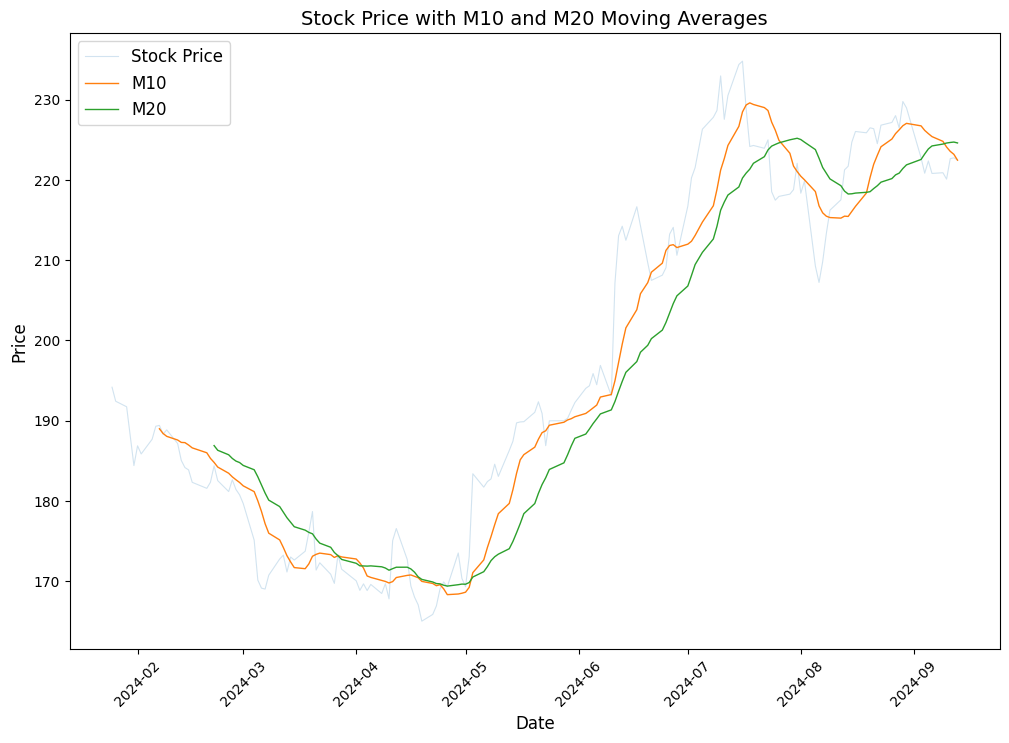

<Figure size 640x480 with 0 Axes>

In [107]:
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', linewidth=0.8, alpha=0.2)

plt.plot(stock_data.index, stock_data['M10'], label='M10', linewidth=1, alpha=1)
plt.plot(stock_data.index, stock_data['M20'], label='M20', linewidth=1, alpha=1)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Stock Price with M10 and M20 Moving Averages', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()
plt.savefig('m10m20.png')

END ANALYSIS

In [111]:
#Send mail to user
email = data['stock']['mail']

'@.pl'

In [112]:
import requests
import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
from email import encoders
from analysis import *
from dotenv import load_dotenv
import os

mail = 'YOUR_EMAIL'
password = 'YOUR_PASSWORD'
recipients = email
subject = 'Stock analysis'
smtp_server = 'smtp.PLATFORM.COM'
smtp_port = 587

# Create the email message
msg = MIMEMultipart()
msg['From'] = mail
msg['To'] = ', '.join(recipients)
msg['Subject'] = subject

# Email body
if will_rain:
    body = f'Take an umbrella, it will rain today. The temperature is around {cel_temp}°C. The wind is {wind} meters per second. Humidity is {humidity_data}%, and the pressure is {pressure_data} hPa.'
else:
    body = f'Today is sunny, the temperature is around {cel_temp}°C. The wind is {wind} meters per second. Humidity is {humidity_data}%, and the pressure is {pressure_data} hPa.'
msg.attach(MIMEText(body, 'plain'))

# List of image filenames, transfer from other file called analysis.py
filenames = ['temperature.png', 'humidity.png', 'windspeed.png']
paths = [os.path.join(os.getcwd(), filename) for filename in filenames]

# Attach each image file
for attachment_path in paths:
    if os.path.isfile(attachment_path):
        try:
            print(f"Attaching {attachment_path}")
            with open(attachment_path, 'rb') as img_file:
                img_data = img_file.read()
                image = MIMEImage(
                    img_data, name=os.path.basename(attachment_path))
                msg.attach(image)
        except Exception as e:
            print(f"Error processing file {attachment_path}: {e}")
    else:
        print(f"File not found: {attachment_path}")
# Send the email
    with smtplib.SMTP(smtp_server, smtp_port) as connection:
        connection.starttls()
        connection.login(user=mail, password=password)
        connection.sendmail(
            from_addr=mail,
            to_addrs=recipients,
            msg=msg.as_string()
        )
    print('Email with images was sent successfully!')

ModuleNotFoundError: No module named 'analysis'